# Object Recognition based on Decision Theoretic Method


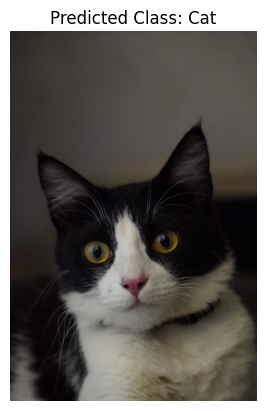

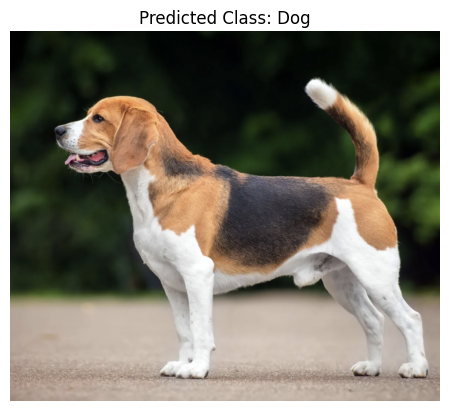

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to extract features (color histogram) from an image
def extract_features(image_path):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (100, 100))  # Resize for consistency
    hist = cv2.calcHist([resized_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = hist.flatten()
    return hist

# Load images and labels
def load_data():
    data = []
    labels = []
    for category in ["cats", "dogs"]:
        folder_path = os.path.join(os.getcwd(), 'dataset', category)
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            features = extract_features(image_path)
            data.append(features)
            labels.append(0 if category == "cats" else 1)
    return np.array(data), np.array(labels)

# Load the dataset
data, labels = load_data()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Save the trained model
# Save the trained model using pickle
model_filename = 'object_detection.pkl'
with open(model_filename, 'wb') as model_file:
    pkl.dump(clf, model_file)

with open(model_filename, 'rb') as model_file:
    loaded_model = pkl.load(model_file)


# Function to predict the class of an image
def predict_class(image_path):
    features = extract_features(image_path).reshape(1, -1)
    prediction = loaded_model.predict(features)
    return prediction[0]

# Test the model with new images
new_images = ["cat.jpeg", "dog.png"]

for image_path in new_images:
    prediction = predict_class(image_path)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title(f"Predicted Class: {'Dog' if prediction == 1 else 'Cat'}")
    plt.show()
